# Imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Creating Environment

In [2]:
env = gym.make("FrozenLake-v0", is_slippery=True)

In [3]:
env.action_space.n

4

In [4]:
env.observation_space.n

16

# State-Action Table

In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
model = {}
e = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters

In [6]:
alpha = 0.1
gamma = 0.99
n = 10
kappa = 0.001

# Dany-Q+

In [7]:
num_episodes = 1000
for i in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        if np.random.uniform(0, 1) < 0.1:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        next_state, reward, done, _ = env.step(action)

        td_error = reward + gamma * np.max(Q[next_state, :]) - Q[state, action]
        Q[state, action] += alpha * td_error

        if state not in model:
            model[state] = {}
        model[state][action] = (next_state, reward)

        for j in range(n):
            state_planning = np.random.choice(list(model.keys()))
            action_planning = np.random.choice(list(model[state_planning].keys()))
            next_state_planning, reward_planning = model[state_planning][action_planning]

            exploration_bonus = kappa * np.sqrt(e[state_planning, action_planning])

            td_error_planning = reward_planning + gamma * (np.max(Q[next_state_planning, :]) + exploration_bonus) - Q[state_planning, action_planning]
            Q[state_planning, action_planning] += alpha * td_error_planning

            e[state_planning, action_planning] += 1

            e *= gamma

        e[state, action] = 1

        state = next_state

# Testing

In [8]:
num_episodes = 100
num_steps = 100
total_reward = 0
for i in range(num_episodes):
    state = env.reset()
    for j in range(num_steps):
        action = np.argmax(Q[state, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
        state = next_state
avg_reward = total_reward / num_episodes
print(f"Average reward per episode: {avg_reward:.2f}")

Average reward per episode: 0.41


# Q Table Plot
### Blue -> Start State | Red -> End State | Green -> Goal State

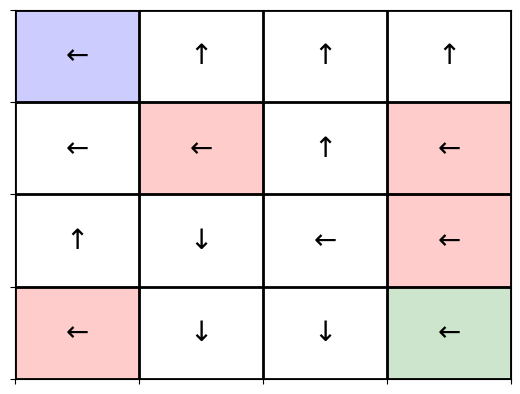

In [9]:
prob_grid = np.reshape(Q, (4, 4, 4))

arrows = ['←', '↓', '→', '↑']
offset = 0.5

fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 5, 1))
ax.grid(which='both', color='black', linestyle='-', linewidth=2)
ax.set_xticklabels([])
ax.set_yticklabels([])
for i in range(4):
    for j in range(4):
        optimal_action = np.argmax(prob_grid[i, j])
        ax.text(j + offset, 3 - i + offset, arrows[optimal_action], ha='center', va='center', fontsize=20)

rects = [plt.Rectangle((0, 3), 1, 1, fc='blue', ec='black', lw=2, alpha=0.2),
         plt.Rectangle((0, 0), 1, 1, fc='red', ec='black', lw=2, alpha=0.2), 
         plt.Rectangle((1, 2), 1, 1, fc='red', ec='black', lw=2, alpha=0.2), 
         plt.Rectangle((3, 2), 1, 1, fc='red', ec='black', lw=2, alpha=0.2),
         plt.Rectangle((3, 1), 1, 1, fc='red', ec='black', lw=2, alpha=0.2),
         plt.Rectangle((3, 0), 1, 1, fc='green', ec='black', lw=2, alpha=0.2)]

for rect in rects:
    ax.add_patch(rect)
    
plt.show()